In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df=pd.read_csv('Seasons_Stats.csv')

In [4]:
df.drop(['blanl','blank2'],inplace=True,axis=1)

In [5]:
df['FTM']=df['FTA']-df['FT']
df=df.dropna()

In [6]:
df['Player']=df['Player'].apply(lambda player: player[:-1] if player[-1]=='*' else player[:])

In [7]:
Fantasy_Stats=df[['Year', 'Player', 'Pos','PTS','AST','TRB','BLK','STL','TOV','3P','FT','FTM']]

In [8]:
Fantasy_Stats=Fantasy_Stats[Fantasy_Stats['Year']>1989.0]


In [9]:
Triple_Doubles = pd.read_excel('TD.xlsx', sheetname='Sheet1')

/home/addybrown/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [10]:
Double_Doubles=pd.read_excel('DD.xlsx', sheetname='Sheet1')

/home/addybrown/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [11]:
Fantasy_Data=pd.merge(Fantasy_Stats, Triple_Doubles,right_on=['Player','Year'],left_on=['Player','Year'], how='left')
Fantasy_Data=pd.merge(Fantasy_Data, Double_Doubles,right_on=['Player','Year'],left_on=['Player','Year'], how='left')
Fantasy_Data=Fantasy_Data.replace(np.NaN,0)

In [12]:
df2=Fantasy_Data

In [13]:
Fantasy_Data['Fantasy_Pts']=df2['PTS']+1.5*df2['AST']+df2['TRB']+2.5*df2['BLK']+2.5*df2['STL']-1.5*df2['TOV']+df2['3P']+0.5*df2['FT']-0.75*df2['FTM']+3*df2['TD']+df2['DD']

In [14]:
df3=Fantasy_Data

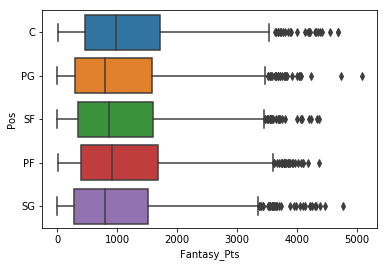

In [15]:
sns.boxplot(x=df3['Fantasy_Pts'],y=df3['Pos'].apply(lambda pos: re.search('(.*)-', pos).group(1) if '-' in pos else pos))

In [16]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FTM'],
      dtype='object')

In [17]:
df4=df[df['Year']>1989]

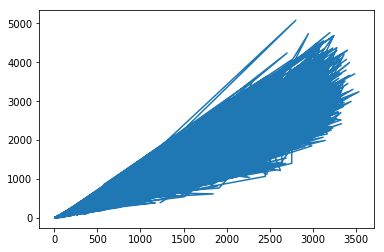

In [18]:
plt.plot(df4['MP'],df3['Fantasy_Pts'])